# **انسحاب العملاء**

انسحاب العملاء، أو ما يُعرف بـ Customer Attrition، هو مقياس يعبّر عن نسبة العملاء الذين توقفوا عن استخدام خدمة الشركة أو أنهوا تعاملهم معها خلال فترة زمنية محددة.

يتم حساب معدل الانسحاب عادةً باستخدام المعادلة التالية:

معدل الانسحاب = عدد العملاء الذين غادروا خلال الفترة ÷ عدد العملاء في بداية الفترة

هذا المقياس يُستخدم على نطاق واسع لتقييم استقرار قاعدة العملاء وفهم سلوكهم على المدى المتوسط والطويل.

# لماذا يُعد انسحاب العملاء مهمًا؟

يُعد انسحاب العملاء من أهم المؤشرات الحيوية للأعمال، وذلك للأسباب التالية:

تكلفة الاحتفاظ أقل من تكلفة الاكتساب
في معظم القطاعات، يكون الاحتفاظ بالعملاء الحاليين أقل تكلفة بكثير من جذب عملاء جدد.
اكتساب عملاء جدد يتطلب:


*   حملات تسويقية
*   جهود مبيعات
*   وقت لبناء الثقة

بينما العملاء الحاليون قد تم بالفعل تجاوز هذه المراحل معهم.

الانسحاب يؤثر مباشرة على الإيرادات
فقدان العملاء يعني:


*   انخفاض الإيرادات المستقبلية
*   انخفاض القيمة العمرية للعميل (Customer Lifetime Value)

*   مؤشر على جودة المنتج أو الخدمة


ارتفاع معدل الانسحاب قد يشير إلى:


*   تجربة مستخدم سيئة


*   مشاكل في التسعير

*   عدم تلبية توقعات العملاء



*   منافسة أقوى في السوق








# أهمية التنبؤ بالانسحاب باستخدام تعلم الآلة

من منظور تعلم الآلة وتحليل البيانات:

التنبؤ المبكر بانسحاب العملاء يسمح للشركات بـ:


*   التدخل الاستباقي (عروض، تحسين تجربة، دعم مخصص)
*   تقليل الخسائر قبل حدوثها


نماذج التنبؤ بالانسحاب تعتمد على:



*   سلوك المستخدم

*   التغيرات في الاستخدام بمرور الوقت

بدلاً من رد الفعل بعد انسحاب العميل، يمكن للشركة التصرف قبل حدوث الانسحاب.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




#Dataset Overview

In [ ]:
import pandas as pd
import json
from pathlib import Path

path = Path("/content/drive/MyDrive/customer_churn.json")

try:
    df = pd.read_json(path, lines=True)  # إذا كان JSON Lines
except ValueError:
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)              # إذا كان JSON عادي
    df = pd.json_normalize(data)

df.head()



,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,userAgent,lastName,firstName,registration,gender,artist,song,length
0,1538352011000,293,292,NextSong,Logged In,PUT,200,free,20,"Corpus Christi, TX","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Morales,Joseph,1.532064e+12,M,Martin Orford,Grand Designs,597.55057
1,1538352025000,98,97,NextSong,Logged In,PUT,200,free,74,"Houston-The Woodlands-Sugar Land, TX","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Larson,Sawyer,1.538070e+12,M,John Brown's Body,Bulls,380.21179
2,1538352118000,179,178,NextSong,Logged In,PUT,200,paid,184,"Orlando-Kissimmee-Sanford, FL","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Santiago,Maverick,1.535953e+12,M,Afroman,Because I Got High,202.37016
3,1538352119000,179,178,Logout,Logged In,PUT,307,paid,185,"Orlando-Kissimmee-Sanford, FL","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Santiago,Maverick,1.535953e+12,M,NaN,NaN,NaN
4,1538352124000,246,245,NextSong,Logged In,PUT,200,paid,22,"Mobile, AL",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Campos,Gianna,1.535931e+12,F,Lily Allen,Smile (Radio Edit),194.53342


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543705 entries, 0 to 543704
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ts             543705 non-null  int64  
 1   userId         543705 non-null  object 
 2   sessionId      543705 non-null  int64  
 3   page           543705 non-null  object 
 4   auth           543705 non-null  object 
 5   method         543705 non-null  object 
 6   status         543705 non-null  int64  
 7   level          543705 non-null  object 
 8   itemInSession  543705 non-null  int64  
 9   location       528005 non-null  object 
 10  userAgent      528005 non-null  object 
 11  lastName       528005 non-null  object 
 12  firstName      528005 non-null  object 
 13  registration   528005 non-null  float64
 14  gender         528005 non-null  object 
 15  artist         432877 non-null  object 
 16  song           432877 non-null  object 
 17  length         432877 non-nul

In [ ]:
df.shape

(543705, 18)

In [ ]:
df.columns

Index(['ts', 'userId', 'sessionId', 'page', 'auth', 'method', 'status',
       'level', 'itemInSession', 'location', 'userAgent', 'lastName',
       'firstName', 'registration', 'gender', 'artist', 'song', 'length'],
      dtype='object')

In [ ]:
#Unique values in each attribute
for item in df.columns:
    print(f"Unique {item}'s count: {df[item].nunique()}")
    print(f"{df[item].unique()}\n\n")

Unique ts's count: 513108
[1538352011000 1538352025000 1538352118000 ... 1543622368000 1543622392000
 1543622401000]


Unique userId's count: 449
['293' '98' '179' '246' '163' '' '175' '100' '39' '147' '196' '275' '54'
 '223' '273' '74' '101' '166' '301' '288' '248' '250' '127' '28' '207'
 '282' '262' '131' '42' '154' '18' '142' '45' '95' '78' '87' '51' '236'
 '251' '126' '85' '173' '185' '36' '208' '192' '187' '92' '27' '143' '119'
 '232' '162' '140' '6' '124' '93' '238' '274' '174' '40' '113' '167' '170'
 '25' '137' '65' '241' '172' '53' '299' '195' '276' '59' '198' '58' '214'
 '283' '231' '160' '32' '29' '291' '295' '61' '225' '284' '270' '21' '234'
 '68' '132' '156' '219' '86' '136' '80' '296' '110' '182' '130' '169'
 '239' '212' '129' '244' '121' '125' '77' '82' '233' '117' '138' '76' '7'
 '206' '13' '201' '118' '261' '268' '258' '16' '226' '105' '96' '57' '115'
 '164' '211' '221' '30' '55' '178' '12' '152' '20' '224' '73' '159' '220'
 '188' '298' '203' '255' '242' '228' '67' '114

In [ ]:
df["page"].value_counts()


,count
page,
NextSong,432877
Home,27412
Thumbs Up,23826
Add to Playlist,12349
Add Friend,8087
Roll Advert,7773
Login,6011
Logout,5990
Thumbs Down,4911


In [ ]:
df["gender"].value_counts()

,count
gender,
M,302612
F,225393


In [ ]:
summary = pd.DataFrame({
    "NA_count": df.isna().sum(),
    "NA_percentage": df.isna().mean() * 100,
    "Distinct_values": df.nunique(dropna=True)
})

summary


,NA_count,NA_percentage,Distinct_values
ts,0,0.000000,513108
userId,0,0.000000,449
sessionId,0,0.000000,4590
page,0,0.000000,22
auth,0,0.000000,4
method,0,0.000000,2
status,0,0.000000,3
level,0,0.000000,2
itemInSession,0,0.000000,1006
location,15700,2.887595,192


#EDA





In [ ]:
events_per_user = df.groupby("userId").size()

events_per_user.describe()


,0
count,449.000000
mean,1210.924276
std,1539.975957
min,3.000000
25%,229.000000
50%,692.000000
75%,1568.000000
max,15700.000000


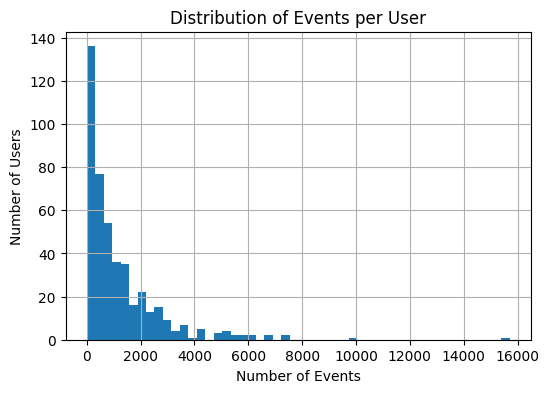

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
events_per_user.hist(bins=50)
plt.title("Distribution of Events per User")
plt.xlabel("Number of Events")
plt.ylabel("Number of Users")
plt.show()


In [ ]:
sessions_per_user = df.groupby("userId")["sessionId"].nunique()
sessions_per_user.describe()


,sessionId
count,449.000000
mean,20.574610
std,148.976821
min,1.000000
25%,5.000000
50%,9.000000
75%,18.000000
max,3158.000000


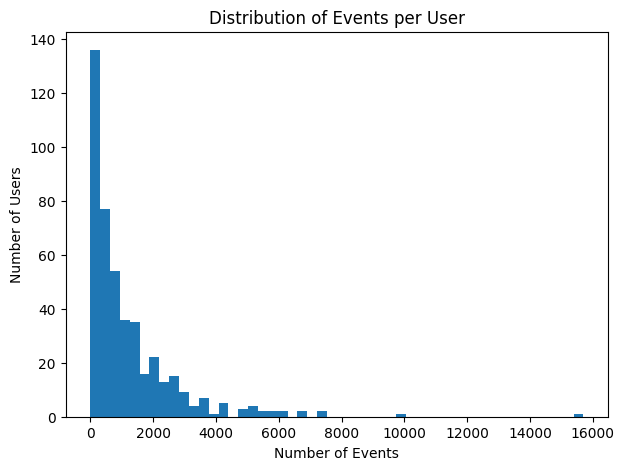

In [ ]:
import matplotlib.pyplot as plt

events_per_user = df.groupby("userId").size()

plt.figure(figsize=(7,5))
plt.hist(events_per_user, bins=50)
plt.title("Distribution of Events per User")
plt.xlabel("Number of Events")
plt.ylabel("Number of Users")
plt.show()


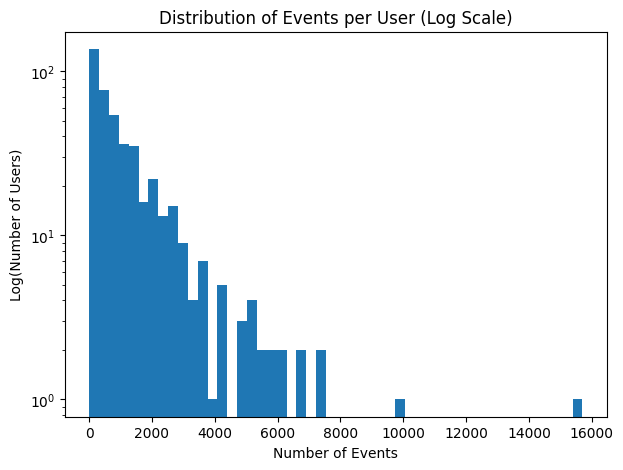

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(events_per_user, bins=50, log=True)
plt.title("Distribution of Events per User (Log Scale)")
plt.xlabel("Number of Events")
plt.ylabel("Log(Number of Users)")
plt.show()


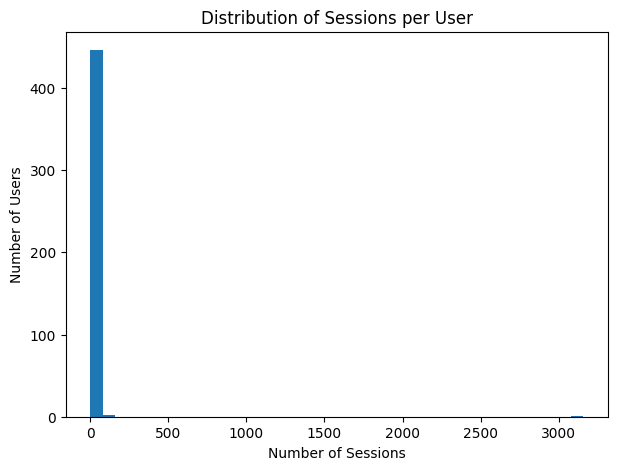

In [ ]:
sessions_per_user = df.groupby("userId")["sessionId"].nunique()

plt.figure(figsize=(7,5))
plt.hist(sessions_per_user, bins=40)
plt.title("Distribution of Sessions per User")
plt.xlabel("Number of Sessions")
plt.ylabel("Number of Users")
plt.show()


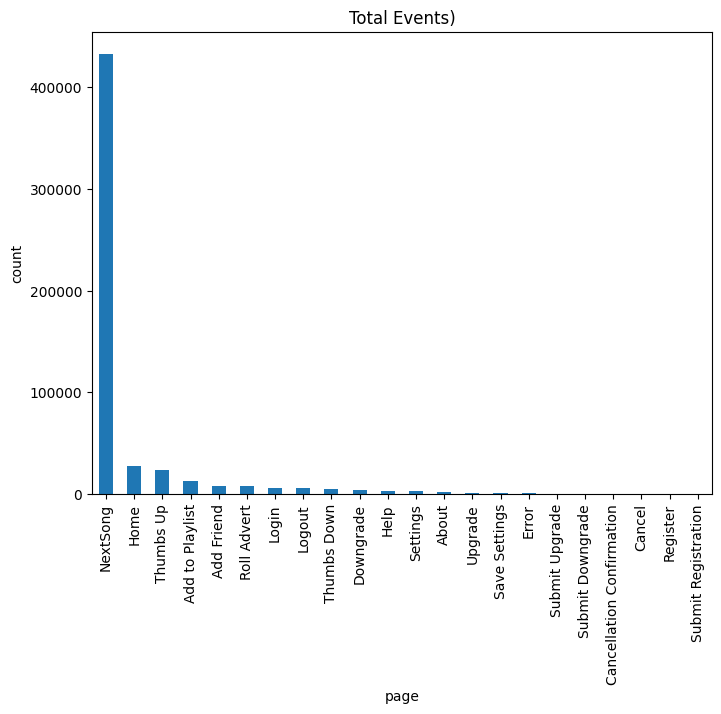

In [ ]:
page_counts = df["page"].value_counts()

plt.figure(figsize=(8,6))
page_counts.plot(kind="bar")
plt.title("Total Events)")
plt.ylabel("count")
plt.show()



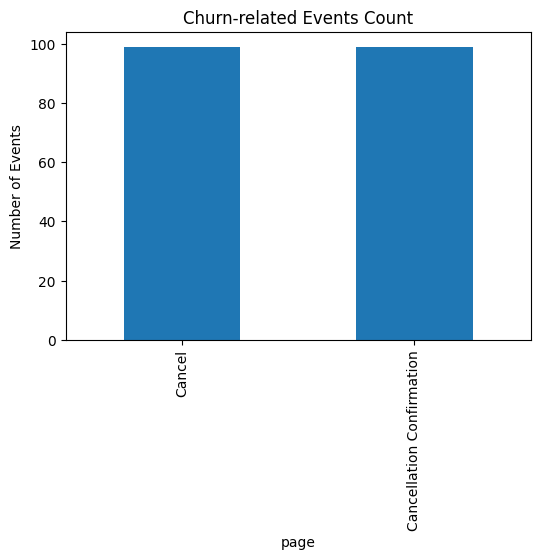

In [ ]:
churn_events = df[df["page"].isin(["Cancel", "Cancellation Confirmation"])]

churn_events["page"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Churn-related Events Count")
plt.ylabel("Number of Events")
plt.show()


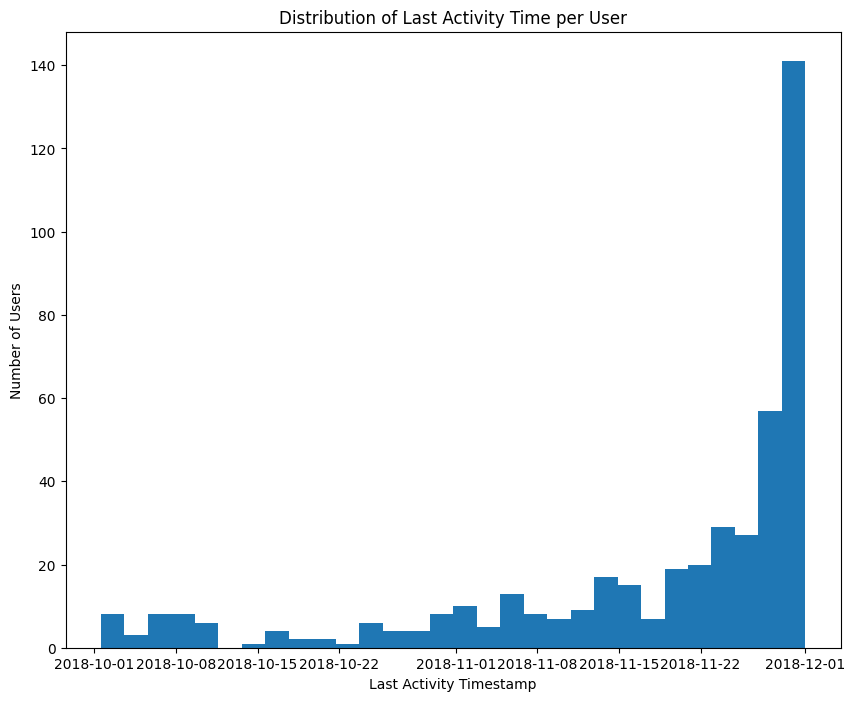

In [ ]:
df["event_time"] = pd.to_datetime(df["ts"], unit="ms")
df["event_time"].min(), df["event_time"].max()
last_event = df.groupby("userId")["event_time"].max()

plt.figure(figsize=(10,8))
plt.hist(last_event, bins=30)
plt.title("Distribution of Last Activity Time per User")
plt.xlabel("Last Activity Timestamp")
plt.ylabel("Number of Users")
plt.show()



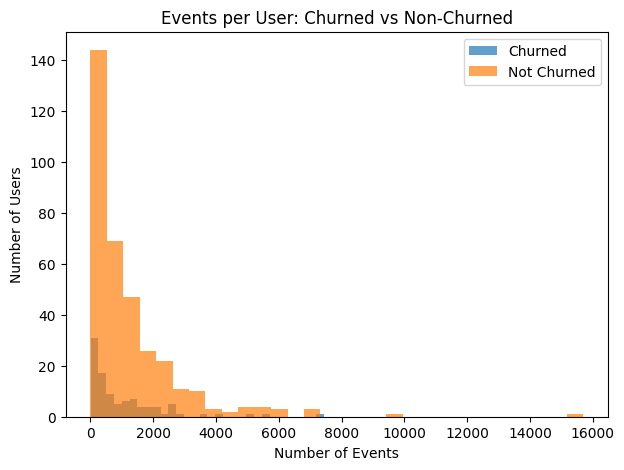

In [ ]:
churn_users = df[df["page"] == "Cancellation Confirmation"]["userId"].unique()

plt.figure(figsize=(7,5))
plt.hist(events_per_user.loc[churn_users], bins=30, alpha=0.7, label="Churned")
plt.hist(events_per_user.drop(churn_users), bins=30, alpha=0.7, label="Not Churned")
plt.legend()
plt.title("Events per User: Churned vs Non-Churned")
plt.xlabel("Number of Events")
plt.ylabel("Number of Users")
plt.show()


In [ ]:
churn_events = df[df["page"] == "Cancellation Confirmation"]


In [ ]:
churn_by_day = (
    churn_events
    .set_index("event_time")
    .resample("D")
    .size()
)


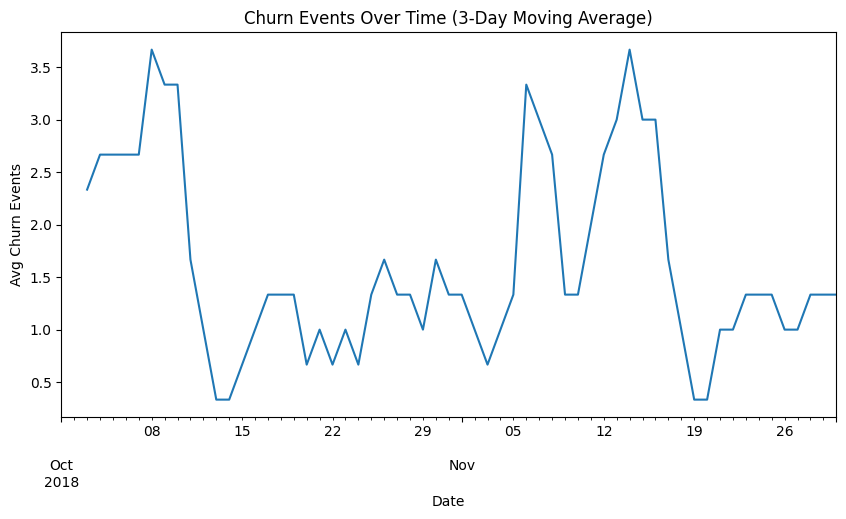

In [ ]:
plt.figure(figsize=(10,5))
churn_by_day.rolling(3).mean().plot()
plt.title("Churn Events Over Time (3-Day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Avg Churn Events")
plt.show()


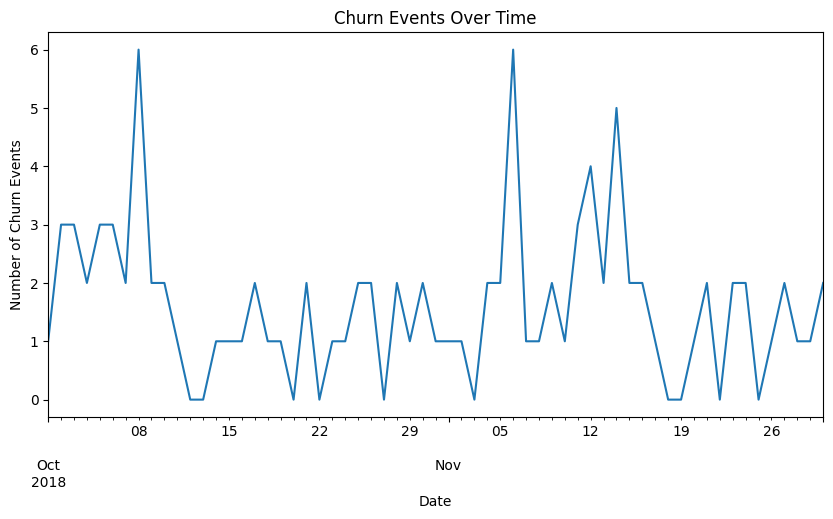

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
churn_by_day.plot()
plt.title("Churn Events Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Churn Events")
plt.show()


In [ ]:
print(df["event_time"].min() ,  df["event_time"].max())

2018-10-01 00:00:11 2018-12-01 00:01:06


In [ ]:

df["event_time"] = pd.to_datetime(df["ts"], unit="ms")

# حساب آخر نشاط لكل مستخدم
last_event_per_user = df.groupby("userId")["event_time"].max()

# وقت التسجيل (registration بالمللي ثانية)
registration_per_user = (
    df.groupby("userId")["registration"]
    .first()
    .dropna()
)

# تحويل registration إلى datetime
registration_per_user = pd.to_datetime(registration_per_user, unit="ms")

# حساب tenure بالأيام
tenure_days = (
    (last_event_per_user - registration_per_user)
    .dt.days
    .dropna()
)

tenure_days.describe()


,0
count,448.000000
mean,82.337054
std,40.534905
min,-1.000000
25%,60.000000
50%,76.000000
75%,99.000000
max,390.000000


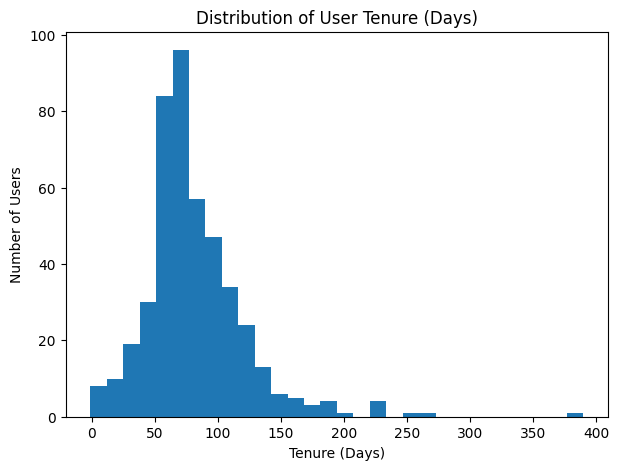

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(tenure_days, bins=30)
plt.title("Distribution of User Tenure (Days)")
plt.xlabel("Tenure (Days)")
plt.ylabel("Number of Users")
plt.show()


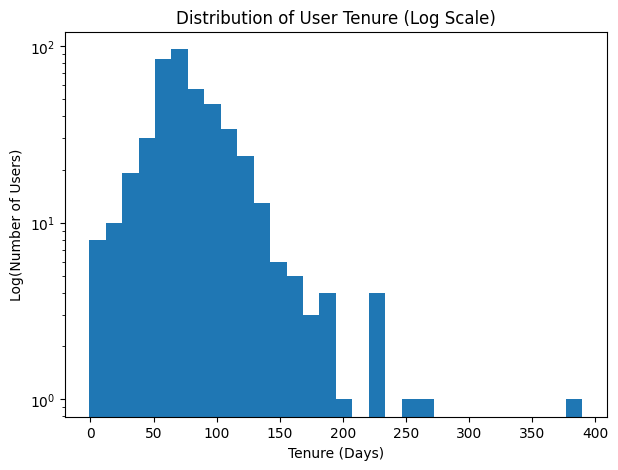

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(tenure_days, bins=30, log=True)
plt.title("Distribution of User Tenure (Log Scale)")
plt.xlabel("Tenure (Days)")
plt.ylabel("Log(Number of Users)")
plt.show()


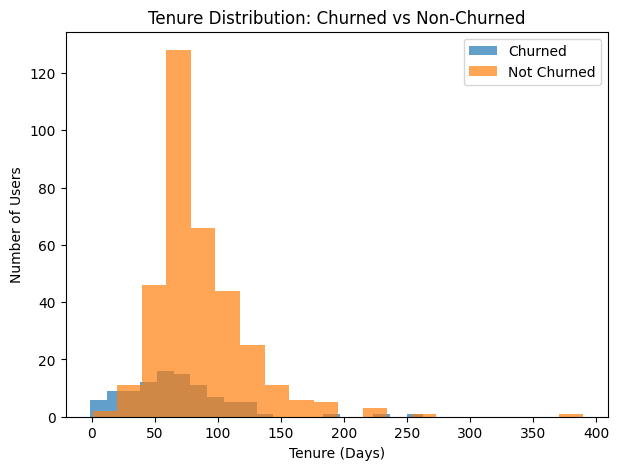

In [ ]:
# تحديد المستخدمين churned
churn_users = df[df["page"] == "Cancellation Confirmation"]["userId"].unique()

tenure_churned = tenure_days.loc[tenure_days.index.isin(churn_users)]
tenure_not_churned = tenure_days.loc[~tenure_days.index.isin(churn_users)]

plt.figure(figsize=(7,5))
plt.hist(tenure_churned, bins=20, alpha=0.7, label="Churned")
plt.hist(tenure_not_churned, bins=20, alpha=0.7, label="Not Churned")
plt.legend()
plt.title("Tenure Distribution: Churned vs Non-Churned")
plt.xlabel("Tenure (Days)")
plt.ylabel("Number of Users")
plt.show()


/tmp/ipython-input-1701292668.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tenure_churned, tenure_not_churned],


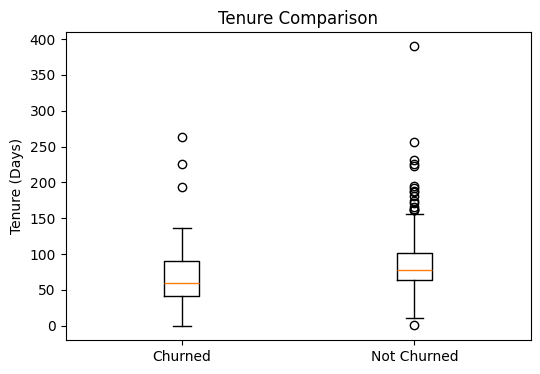

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot([tenure_churned, tenure_not_churned],
            labels=["Churned", "Not Churned"])
plt.title("Tenure Comparison")
plt.ylabel("Tenure (Days)")
plt.show()


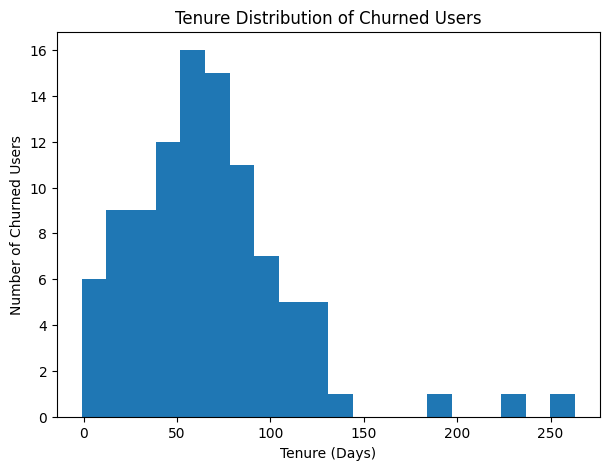

In [ ]:
import matplotlib.pyplot as plt

# users who churned
churn_users = df[df["page"] == "Cancellation Confirmation"]["userId"].unique()

# tenure of churned users only
tenure_churned = tenure_days.loc[tenure_days.index.isin(churn_users)]

plt.figure(figsize=(7,5))
plt.hist(tenure_churned, bins=20)
plt.title("Tenure Distribution of Churned Users")
plt.xlabel("Tenure (Days)")
plt.ylabel("Number of Churned Users")
plt.show()


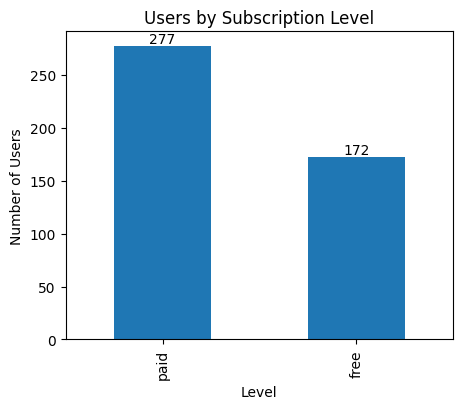

In [ ]:
import matplotlib.pyplot as plt

level_per_user = df.groupby("userId")["level"].last()

level_counts = level_per_user.value_counts()

plt.figure(figsize=(5,4))
ax = level_counts.plot(kind="bar")
plt.title("Users by Subscription Level")
plt.xlabel("Level")
plt.ylabel("Number of Users")

for c in ax.containers:
    ax.bar_label(c)

plt.show()


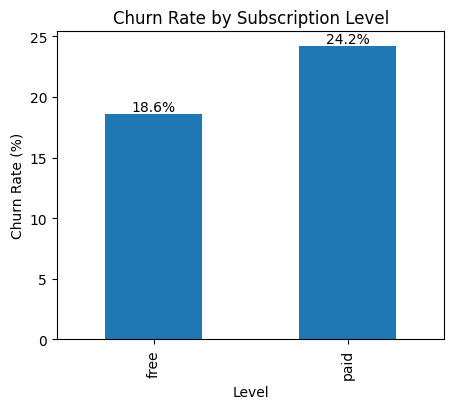

In [ ]:
# تعريف churned users
churn_users = df[df["page"] == "Cancellation Confirmation"]["userId"].unique()

user_table = pd.DataFrame({
    "level": level_per_user,
    "churn": level_per_user.index.isin(churn_users).astype(int)
})

churn_rate_by_level = user_table.groupby("level")["churn"].mean() * 100

plt.figure(figsize=(5,4))
ax = churn_rate_by_level.plot(kind="bar")
plt.title("Churn Rate by Subscription Level")
plt.xlabel("Level")
plt.ylabel("Churn Rate (%)")

for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%")

plt.show()


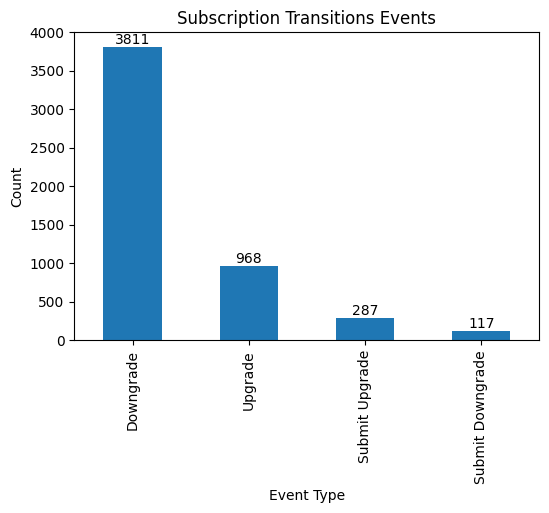

In [ ]:
transitions = df[df["page"].isin(["Upgrade", "Downgrade", "Submit Upgrade", "Submit Downgrade"])]

transition_counts = transitions["page"].value_counts()

plt.figure(figsize=(6,4))
ax = transition_counts.plot(kind="bar")
plt.title("Subscription Transitions Events")
plt.xlabel("Event Type")
plt.ylabel("Count")

for c in ax.containers:
    ax.bar_label(c)

plt.show()


# Feature Engineering

In [ ]:
df.head()

,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,userAgent,lastName,firstName,registration,gender,artist,song,length,event_time
0,1538352011000,293,292,NextSong,Logged In,PUT,200,free,20,"Corpus Christi, TX","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Morales,Joseph,1.532064e+12,M,Martin Orford,Grand Designs,597.55057,2018-10-01 00:00:11
1,1538352025000,98,97,NextSong,Logged In,PUT,200,free,74,"Houston-The Woodlands-Sugar Land, TX","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Larson,Sawyer,1.538070e+12,M,John Brown's Body,Bulls,380.21179,2018-10-01 00:00:25
2,1538352118000,179,178,NextSong,Logged In,PUT,200,paid,184,"Orlando-Kissimmee-Sanford, FL","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Santiago,Maverick,1.535953e+12,M,Afroman,Because I Got High,202.37016,2018-10-01 00:01:58
3,1538352119000,179,178,Logout,Logged In,PUT,307,paid,185,"Orlando-Kissimmee-Sanford, FL","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",Santiago,Maverick,1.535953e+12,M,NaN,NaN,NaN,2018-10-01 00:01:59
4,1538352124000,246,245,NextSong,Logged In,PUT,200,paid,22,"Mobile, AL",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Campos,Gianna,1.535931e+12,F,Lily Allen,Smile (Radio Edit),194.53342,2018-10-01 00:02:04


In [ ]:
import pandas as pd


df["event_time"] = pd.to_datetime(df["ts"], unit="ms", errors="coerce")
df["registration_time"] = pd.to_datetime(df["registration"], unit="ms", errors="coerce")


df = df.sort_values(
    ["userId", "event_time", "sessionId", "itemInSession"]
).reset_index(drop=True)


def extract_device_type(ua):
    if pd.isna(ua):
        return "Unknown"
    s = str(ua).lower()
    if "ipad" in s or "tablet" in s:
        return "Tablet"
    if "iphone" in s or "android" in s or "mobile" in s:
        return "Mobile"
    return "Desktop"

df["device_type"] = df["userAgent"].apply(extract_device_type)


print("Shape:", df.shape)
print("Users:", df["userId"].nunique())
print("Time range:", df["event_time"].min(), "->", df["event_time"].max())
print("Missing event_time:", df["event_time"].isna().sum())


Shape: (543705, 21)
Users: 449
Time range: 2018-10-01 00:00:11 -> 2018-12-01 00:01:06
Missing event_time: 0


In [ ]:
df.head()

,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,...,lastName,firstName,registration,gender,artist,song,length,event_time,registration_time,device_type
0,1538352148000,,178,Home,Logged Out,GET,200,paid,186,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-01 00:02:28,NaT,Unknown
1,1538352151000,,178,Home,Logged Out,GET,200,paid,187,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-01 00:02:31,NaT,Unknown
2,1538352168000,,178,Home,Logged Out,GET,200,paid,188,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-01 00:02:48,NaT,Unknown
3,1538352169000,,178,Login,Logged Out,PUT,307,paid,189,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-01 00:02:49,NaT,Unknown
4,1538353292000,,442,Home,Logged Out,GET,200,free,114,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-01 00:21:32,NaT,Unknown


find churn events

In [ ]:
churn_events = df[df["page"] == "Cancellation Confirmation"]


In [ ]:
#churn_time per user
churn_time = (
    churn_events
    .groupby("userId")["event_time"]
    .min()
    .rename("churn_time")
)


In [ ]:
#build user label table
user_labels = pd.DataFrame(
    index=df["userId"].unique()
)

user_labels["churn"] = user_labels.index.isin(churn_time.index).astype(int)
user_labels = user_labels.join(churn_time)

In [ ]:
user_labels["churn"].value_counts()

,count
churn,
0,350
1,99


In [ ]:
user_labels.head(20)

,churn,churn_time
,0,NaT
10,1,2018-10-09 03:22:44
100,0,NaT
100001,1,2018-10-02 14:50:59
100002,0,NaT
100003,1,2018-11-08 07:19:52
100004,1,2018-10-14 10:13:00
100005,1,2018-10-06 10:11:19
100006,0,NaT
100007,0,NaT


In [ ]:
user_labels.columns

Index(['churn', 'churn_time'], dtype='object')

In [ ]:
# churn_time exists only for churned users
assert user_labels.loc[user_labels["churn"] == 0, "churn_time"].isna().all()

# churn_time exists for all churned users
assert user_labels.loc[user_labels["churn"] == 1, "churn_time"].notna().all()


In [ ]:
#Merge labels back to event data
df_fe = df.merge(
    user_labels,
    left_on="userId",
    right_index=True,
    how="left"
)

In [ ]:
#Apply temporal cutoff
df_fe = df_fe[
    (df_fe["churn"] == 0) |
    (df_fe["event_time"] < df_fe["churn_time"])
]

In [ ]:
#Core activity features
#Total events per user
events_per_user = df_fe.groupby("userId").size().rename("num_events")

In [ ]:
#Sessions per user
sessions_per_user = (
    df_fe.groupby("userId")["sessionId"]
    .nunique()
    .rename("num_sessions")
)

In [ ]:
#Average events per session
events_per_session = (
    events_per_user / sessions_per_user
).rename("events_per_session")

In [ ]:
#Engagement features
engagement_pages = [
    "Thumbs Up",
    "Thumbs Down",
    "Add to Playlist",
    "Add Friend"
]

engagement_counts = (
    df_fe[df_fe["page"].isin(engagement_pages)]
    .groupby(["userId", "page"])
    .size()
    .unstack(fill_value=0)
)

In [ ]:
#Listening behavior features
listening_events = df_fe[df_fe["page"] == "NextSong"]

song_count = (
    listening_events.groupby("userId")
    .size()
    .rename("num_songs")
)

total_listen_time = (
    listening_events.groupby("userId")["length"]
    .sum()
    .rename("total_listen_time")
)

In [ ]:
#Subscription behavior features
#Last known level before churn
last_level = (
    df_fe.sort_values("event_time")
    .groupby("userId")["level"]
    .last()
    .rename("last_level")
)

In [ ]:
#Downgrade count
downgrade_count = (
    df_fe[df_fe["page"] == "Downgrade"]
    .groupby("userId")
    .size()
    .rename("num_downgrades")
)

In [ ]:
#Tenure feature (very important)
first_event_time = df_fe.groupby("userId")["event_time"].min()

tenure_days = (
    (first_event_time - df_fe.groupby("userId")["registration_time"].first())
    .dt.days
    .rename("tenure_days")
)

In [ ]:
#Device feature
device_type = (
    df_fe.groupby("userId")["device_type"]
    .agg(lambda x: x.mode().iloc[0])
    .rename("device_type")
)

In [ ]:
#Combine all features into one table
user_features = pd.concat(
    [
        events_per_user,
        sessions_per_user,
        events_per_session,
        engagement_counts,
        song_count,
        total_listen_time,
        last_level,
        downgrade_count,
        tenure_days,
        device_type,
        user_labels
    ],
    axis=1
).fillna(0)

In [ ]:

user_features.head(20)

,num_events,num_sessions,events_per_session,Add Friend,Add to Playlist,Thumbs Down,Thumbs Up,num_songs,total_listen_time,last_level,num_downgrades,tenure_days,device_type,churn,churn_time
,15700,3158,4.971501,0.0,0.0,0.0,0.0,0.0,0.00000,paid,0.0,0.0,Unknown,0,0
10,422,1,422.000000,3.0,14.0,1.0,17.0,360.0,90524.44076,paid,1.0,9.0,Desktop,1,2018-10-09 03:22:44
100,3999,39,102.538462,71.0,94.0,37.0,143.0,3382.0,829748.33112,paid,40.0,4.0,Desktop,0,0
100001,133,3,44.333333,1.0,3.0,1.0,5.0,96.0,23795.33930,free,0.0,43.0,Desktop,1,2018-10-02 14:50:59
100002,177,4,44.250000,0.0,3.0,2.0,8.0,137.0,36769.06108,free,2.0,106.0,Desktop,0,0
100003,826,9,91.777778,8.0,19.0,10.0,16.0,661.0,162292.65050,paid,13.0,20.0,Desktop,1,2018-11-08 07:19:52
100004,372,5,74.400000,7.0,7.0,2.0,15.0,262.0,65262.40525,free,0.0,115.0,Desktop,1,2018-10-14 10:13:00
100005,99,2,49.500000,0.0,1.0,1.0,2.0,72.0,17353.58045,free,0.0,67.0,Desktop,1,2018-10-06 10:11:19
100006,375,5,75.000000,1.0,2.0,3.0,14.0,295.0,71736.10788,free,1.0,9.0,Desktop,0,0
100007,1052,12,87.666667,10.0,27.0,6.0,40.0,853.0,210102.75767,free,18.0,57.0,Desktop,0,0


In [ ]:
user_features.shape

(449, 15)

In [ ]:
user_features.columns

Index(['num_events', 'num_sessions', 'events_per_session', 'Add Friend',
       'Add to Playlist', 'Thumbs Down', 'Thumbs Up', 'num_songs',
       'total_listen_time', 'last_level', 'num_downgrades', 'tenure_days',
       'device_type', 'churn', 'churn_time'],
      dtype='object')

User-level features were engineered by aggregating behavioral events occurring strictly before churn. These features capture activity intensity, session behavior, engagement actions, listening patterns, subscription changes, tenure, and device usage. A temporal cutoff was applied using churn timestamps to prevent data leakage.

# Modeling & Evaluation (Churn Prediction)

In [ ]:
#Prepare X and y
#Drop non-feature columns
X = user_features.drop(columns=["churn", "churn_time"])
y = user_features["churn"]

In [ ]:
#Handle categorical features
X = pd.get_dummies(
    X,
    columns=["last_level", "device_type"],
    drop_first=True
)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
#Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70        70
           1       0.35      0.85      0.50        20

    accuracy                           0.62        90
   macro avg       0.64      0.70      0.60        90
weighted avg       0.80      0.62      0.65        90



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc


np.float64(0.7842857142857143)

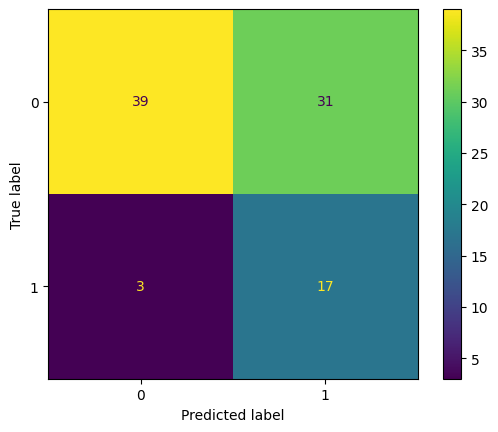

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
import pandas as pd

feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

feature_importance.head(10)


,0
num_downgrades,0.100151
Add to Playlist,-0.085546
num_sessions,-0.069657
Add Friend,-0.024952
device_type_Mobile,0.023879
num_songs,-0.020902
Thumbs Down,0.018803
Thumbs Up,-0.014258
num_events,0.013738
last_level_paid,0.006389


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
)
rf_model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=10, n_estimators=300, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


              precision    recall  f1-score   support

           0       0.81      0.81      0.81        70
           1       0.35      0.35      0.35        20

    accuracy                           0.71        90
   macro avg       0.58      0.58      0.58        90
weighted avg       0.71      0.71      0.71        90

ROC-AUC: 0.5742857142857143


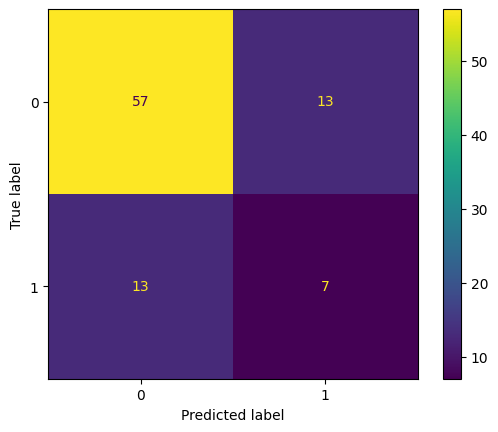

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Probabilities for class 1 (churn)
y_proba = model.predict_proba(X_test)[:, 1]


In [ ]:
thresholds = np.arange(0.10, 0.91, 0.05)

rows = []
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()

    prec1 = precision_score(y_test, y_pred_t, pos_label=1, zero_division=0)
    rec1  = recall_score(y_test, y_pred_t, pos_label=1, zero_division=0)
    f11   = f1_score(y_test, y_pred_t, pos_label=1, zero_division=0)

    rows.append({
        "threshold": t,
        "TP": tp, "FP": fp, "TN": tn, "FN": fn,
        "precision_churn": prec1,
        "recall_churn": rec1,
        "f1_churn": f11
    })

results = pd.DataFrame(rows).sort_values("threshold")
results


,threshold,TP,FP,TN,FN,precision_churn,recall_churn,f1_churn
0,0.10,20,67,3,0,0.229885,1.00,0.373832
1,0.15,20,67,3,0,0.229885,1.00,0.373832
2,0.20,20,65,5,0,0.235294,1.00,0.380952
3,0.25,20,63,7,0,0.240964,1.00,0.388350
4,0.30,20,60,10,0,0.250000,1.00,0.400000
5,0.35,20,57,13,0,0.259740,1.00,0.412371
6,0.40,20,53,17,0,0.273973,1.00,0.430108
7,0.45,20,39,31,0,0.338983,1.00,0.506329
8,0.50,17,31,39,3,0.354167,0.85,0.500000
9,0.55,14,18,52,6,0.437500,0.70,0.538462


In [ ]:
target_recall = 0.70

filtered = results[results["recall_churn"] >= target_recall].copy()
filtered = filtered.sort_values(["FP", "threshold"], ascending=[True, True])

filtered.head(10)


,threshold,TP,FP,TN,FN,precision_churn,recall_churn,f1_churn
9,0.55,14,18,52,6,0.437500,0.70,0.538462
8,0.50,17,31,39,3,0.354167,0.85,0.500000
7,0.45,20,39,31,0,0.338983,1.00,0.506329
6,0.40,20,53,17,0,0.273973,1.00,0.430108
5,0.35,20,57,13,0,0.259740,1.00,0.412371
4,0.30,20,60,10,0,0.250000,1.00,0.400000
3,0.25,20,63,7,0,0.240964,1.00,0.388350
2,0.20,20,65,5,0,0.235294,1.00,0.380952
0,0.10,20,67,3,0,0.229885,1.00,0.373832
1,0.15,20,67,3,0,0.229885,1.00,0.373832


In [ ]:
best_t = filtered.iloc[0]["threshold"]
best_t


np.float64(0.5500000000000002)

Chosen threshold: 0.5500000000000002
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        70
           1       0.44      0.70      0.54        20

    accuracy                           0.73        90
   macro avg       0.67      0.72      0.68        90
weighted avg       0.79      0.73      0.75        90



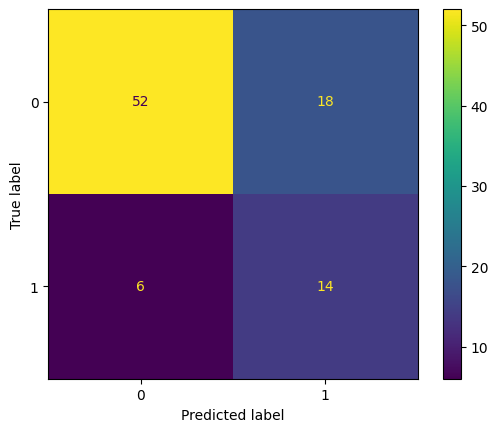

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_best = (y_proba >= best_t).astype(int)

print("Chosen threshold:", best_t)
print(classification_report(y_test, y_pred_best))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.show()


In [ ]:
!pip install xgboost


In [ ]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
scale_pos_weight


np.float64(3.5443037974683542)

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=4,              # shallow trees
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=10,      # strong regularization
    reg_alpha=1.0,            # L1 regularization
    reg_lambda=1.0,           # L2 regularization
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42
)

In [ ]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        70
           1       0.22      0.30      0.26        20

    accuracy                           0.61        90
   macro avg       0.50      0.50      0.50        90
weighted avg       0.65      0.61      0.63        90

ROC-AUC: 0.5571428571428572


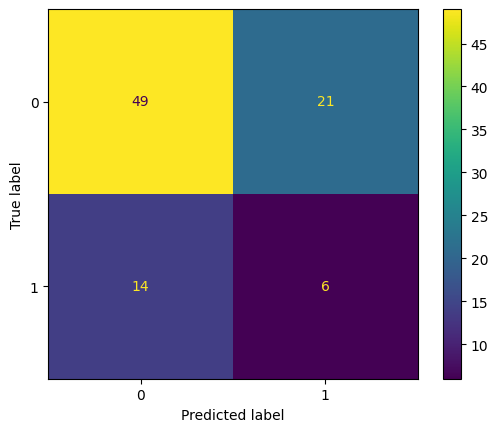

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.show()


In [ ]:
print(type(model))
print(X.shape)
print(X.columns[:10])


<class 'sklearn.linear_model._logistic.LogisticRegression'>
(449, 15)
Index(['num_events', 'num_sessions', 'events_per_session', 'Add Friend',
       'Add to Playlist', 'Thumbs Down', 'Thumbs Up', 'num_songs',
       'total_listen_time', 'num_downgrades'],
      dtype='object')


In [ ]:
import joblib, json


joblib.dump(model, "model.joblib")


with open("feature_columns.json", "w") as f:
    json.dump(list(X.columns), f)


with open("threshold.json", "w") as f:
    json.dump({"threshold": float(best_t)}, f)

print("Saved: model.joblib, feature_columns.json, threshold.json")
